In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model as md
import copy
from pytorch_ssim import ssim
from torch.utils.data import DataLoader

In [2]:
# print gpu
torch.cuda.set_device(4)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 4
8
(6, 1)
1.0.0


In [3]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:4')
else:
    device = "cpu"
print(device)

cuda:4


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),
                                               dt.ToTensor(),
                                               dt.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])                                           
                                           ]))
# TODO: change the normalization parameters

In [5]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=100,
                        shuffle=True, num_workers=0)

In [ ]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [6]:
print('===> Building model')
model = md.Net().to(device)
criterionMSE = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.1)


===> Building model


In [7]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = -(ssim(output, targetf)-1)
        
        p = 0.25
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [8]:
for epoch in range(1, 10 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 2.1877079010009766 lossSSIM: 1.1010581254959106
===> Epoch[1](0/8110): Loss: 1.3727
lossMSE: 1.953629970550537 lossSSIM: 1.0336592197418213
===> Epoch[1](50/8110): Loss: 1.2637
lossMSE: 1.7648597955703735 lossSSIM: 1.0232607126235962
===> Epoch[1](100/8110): Loss: 1.2087
lossMSE: 1.576941967010498 lossSSIM: 1.0178065299987793
===> Epoch[1](150/8110): Loss: 1.1576
lossMSE: 1.4379291534423828 lossSSIM: 1.0191327333450317
===> Epoch[1](200/8110): Loss: 1.1238
lossMSE: 1.3351436853408813 lossSSIM: 1.0160794258117676
===> Epoch[1](250/8110): Loss: 1.0958
lossMSE: 1.2499107122421265 lossSSIM: 1.0138956308364868
===> Epoch[1](300/8110): Loss: 1.0729
lossMSE: 1.1840966939926147 lossSSIM: 1.0122668743133545
===> Epoch[1](350/8110): Loss: 1.0552
lossMSE: 1.1722099781036377 lossSSIM: 1.011806607246399
===> Epoch[1](400/8110): Loss: 1.0519
lossMSE: 1.1165852546691895 lossSSIM: 1.0114742517471313
===> Epoch[1](450/8110): Loss: 1.0378
lossMSE: 1.1007307767868042 lossSSIM: 1.009819746017456


lossMSE: 0.9842938780784607 lossSSIM: 1.0019030570983887
===> Epoch[1](4300/8110): Loss: 0.9975
lossMSE: 0.9838666319847107 lossSSIM: 1.0018354654312134
===> Epoch[1](4350/8110): Loss: 0.9973
lossMSE: 0.9590764045715332 lossSSIM: 1.0018264055252075
===> Epoch[1](4400/8110): Loss: 0.9911
lossMSE: 0.9767499566078186 lossSSIM: 1.0018724203109741
===> Epoch[1](4450/8110): Loss: 0.9956
lossMSE: 0.9704901576042175 lossSSIM: 1.0018130540847778
===> Epoch[1](4500/8110): Loss: 0.9940
lossMSE: 0.9558037519454956 lossSSIM: 1.0018435716629028
===> Epoch[1](4550/8110): Loss: 0.9903
lossMSE: 0.9605242013931274 lossSSIM: 1.0017857551574707
===> Epoch[1](4600/8110): Loss: 0.9915
lossMSE: 0.9739366769790649 lossSSIM: 1.0018137693405151
===> Epoch[1](4650/8110): Loss: 0.9948
lossMSE: 0.9633535146713257 lossSSIM: 1.001857876777649
===> Epoch[1](4700/8110): Loss: 0.9922
lossMSE: 0.9727911949157715 lossSSIM: 1.0018080472946167
===> Epoch[1](4750/8110): Loss: 0.9946
lossMSE: 0.9705262780189514 lossSSIM: 1.0

lossMSE: 0.9641979932785034 lossSSIM: 1.001731514930725
===> Epoch[2](450/8110): Loss: 0.9923
lossMSE: 0.9624587893486023 lossSSIM: 1.001754879951477
===> Epoch[2](500/8110): Loss: 0.9919
lossMSE: 0.9803807139396667 lossSSIM: 1.0016776323318481
===> Epoch[2](550/8110): Loss: 0.9964
lossMSE: 0.9739828705787659 lossSSIM: 1.0017040967941284
===> Epoch[2](600/8110): Loss: 0.9948
lossMSE: 0.9747862815856934 lossSSIM: 1.0017465353012085
===> Epoch[2](650/8110): Loss: 0.9950
lossMSE: 0.9605003595352173 lossSSIM: 1.0016688108444214
===> Epoch[2](700/8110): Loss: 0.9914
lossMSE: 0.9735003113746643 lossSSIM: 1.0017071962356567
===> Epoch[2](750/8110): Loss: 0.9947
lossMSE: 0.9638087153434753 lossSSIM: 1.0017224550247192
===> Epoch[2](800/8110): Loss: 0.9922
lossMSE: 0.9630942344665527 lossSSIM: 1.001712441444397
===> Epoch[2](850/8110): Loss: 0.9921
lossMSE: 0.942817747592926 lossSSIM: 1.0017167329788208
===> Epoch[2](900/8110): Loss: 0.9870
lossMSE: 0.9611804485321045 lossSSIM: 1.00173461437225

lossMSE: 0.9610016942024231 lossSSIM: 1.0017870664596558
===> Epoch[2](4750/8110): Loss: 0.9916
lossMSE: 0.9485211372375488 lossSSIM: 1.0016720294952393
===> Epoch[2](4800/8110): Loss: 0.9884
lossMSE: 0.9686926007270813 lossSSIM: 1.0016632080078125
===> Epoch[2](4850/8110): Loss: 0.9934
lossMSE: 0.9602590203285217 lossSSIM: 1.00172758102417
===> Epoch[2](4900/8110): Loss: 0.9914
lossMSE: 0.9596301913261414 lossSSIM: 1.0017614364624023
===> Epoch[2](4950/8110): Loss: 0.9912
lossMSE: 0.976698637008667 lossSSIM: 1.0016738176345825
===> Epoch[2](5000/8110): Loss: 0.9954
lossMSE: 0.9626394510269165 lossSSIM: 1.0017800331115723
===> Epoch[2](5050/8110): Loss: 0.9920
lossMSE: 0.9788159728050232 lossSSIM: 1.0017584562301636
===> Epoch[2](5100/8110): Loss: 0.9960
lossMSE: 0.967394232749939 lossSSIM: 1.0016881227493286
===> Epoch[2](5150/8110): Loss: 0.9931
lossMSE: 0.9555833339691162 lossSSIM: 1.0017048120498657
===> Epoch[2](5200/8110): Loss: 0.9902
lossMSE: 0.9905450940132141 lossSSIM: 1.0017

lossMSE: 0.9535238742828369 lossSSIM: 1.0017518997192383
===> Epoch[3](900/8110): Loss: 0.9897
lossMSE: 0.9759718775749207 lossSSIM: 1.0016679763793945
===> Epoch[3](950/8110): Loss: 0.9952
lossMSE: 0.9973179697990417 lossSSIM: 1.0017597675323486
===> Epoch[3](1000/8110): Loss: 1.0006
lossMSE: 0.9770228266716003 lossSSIM: 1.0016906261444092
===> Epoch[3](1050/8110): Loss: 0.9955
lossMSE: 0.9600697755813599 lossSSIM: 1.0015596151351929
===> Epoch[3](1100/8110): Loss: 0.9912
lossMSE: 0.9693208336830139 lossSSIM: 1.0017750263214111
===> Epoch[3](1150/8110): Loss: 0.9937
lossMSE: 0.9685044288635254 lossSSIM: 1.0017415285110474
===> Epoch[3](1200/8110): Loss: 0.9934
lossMSE: 0.9677994847297668 lossSSIM: 1.0017075538635254
===> Epoch[3](1250/8110): Loss: 0.9932
lossMSE: 0.9619770646095276 lossSSIM: 1.0017145872116089
===> Epoch[3](1300/8110): Loss: 0.9918
lossMSE: 0.9882473349571228 lossSSIM: 1.0017424821853638
===> Epoch[3](1350/8110): Loss: 0.9984
lossMSE: 0.9756469130516052 lossSSIM: 1.00

lossMSE: 0.9801355004310608 lossSSIM: 1.0016987323760986
===> Epoch[3](5200/8110): Loss: 0.9963
lossMSE: 0.9523710012435913 lossSSIM: 1.0016875267028809
===> Epoch[3](5250/8110): Loss: 0.9894
lossMSE: 0.9814148545265198 lossSSIM: 1.0017421245574951
===> Epoch[3](5300/8110): Loss: 0.9967
lossMSE: 0.9841791391372681 lossSSIM: 1.0016990900039673
===> Epoch[3](5350/8110): Loss: 0.9973
lossMSE: 0.9957695603370667 lossSSIM: 1.0017337799072266
===> Epoch[3](5400/8110): Loss: 1.0002
lossMSE: 0.9748003482818604 lossSSIM: 1.0017560720443726
===> Epoch[3](5450/8110): Loss: 0.9950
lossMSE: 0.9784069657325745 lossSSIM: 1.0016967058181763
===> Epoch[3](5500/8110): Loss: 0.9959
lossMSE: 0.9762242436408997 lossSSIM: 1.001710295677185
===> Epoch[3](5550/8110): Loss: 0.9953
lossMSE: 0.9611389636993408 lossSSIM: 1.0017107725143433
===> Epoch[3](5600/8110): Loss: 0.9916
lossMSE: 0.9506212472915649 lossSSIM: 1.0016820430755615
===> Epoch[3](5650/8110): Loss: 0.9889
lossMSE: 0.9688674807548523 lossSSIM: 1.0

lossMSE: 0.9914112091064453 lossSSIM: 1.0017248392105103
===> Epoch[4](1350/8110): Loss: 0.9991
lossMSE: 0.9787805080413818 lossSSIM: 1.001758098602295
===> Epoch[4](1400/8110): Loss: 0.9960
lossMSE: 0.9549127221107483 lossSSIM: 1.0017406940460205
===> Epoch[4](1450/8110): Loss: 0.9900
lossMSE: 0.9534181952476501 lossSSIM: 1.0017439126968384
===> Epoch[4](1500/8110): Loss: 0.9897
lossMSE: 0.9591270685195923 lossSSIM: 1.001578688621521
===> Epoch[4](1550/8110): Loss: 0.9910
lossMSE: 0.966517984867096 lossSSIM: 1.0017108917236328
===> Epoch[4](1600/8110): Loss: 0.9929
lossMSE: 0.9775025248527527 lossSSIM: 1.0017156600952148
===> Epoch[4](1650/8110): Loss: 0.9957
lossMSE: 0.9903672337532043 lossSSIM: 1.0017385482788086
===> Epoch[4](1700/8110): Loss: 0.9989
lossMSE: 0.9565740823745728 lossSSIM: 1.0017037391662598
===> Epoch[4](1750/8110): Loss: 0.9904
lossMSE: 0.9680077433586121 lossSSIM: 1.0016579627990723
===> Epoch[4](1800/8110): Loss: 0.9932
lossMSE: 0.9821276068687439 lossSSIM: 1.001

lossMSE: 0.9720765948295593 lossSSIM: 1.0017497539520264
===> Epoch[4](5650/8110): Loss: 0.9943
lossMSE: 0.9685589075088501 lossSSIM: 1.001665472984314
===> Epoch[4](5700/8110): Loss: 0.9934
lossMSE: 0.9649922251701355 lossSSIM: 1.0016846656799316
===> Epoch[4](5750/8110): Loss: 0.9925
lossMSE: 0.9821035861968994 lossSSIM: 1.0016916990280151
===> Epoch[4](5800/8110): Loss: 0.9968
lossMSE: 0.9627191424369812 lossSSIM: 1.0016499757766724
===> Epoch[4](5850/8110): Loss: 0.9919
lossMSE: 0.9784948825836182 lossSSIM: 1.0017225742340088
===> Epoch[4](5900/8110): Loss: 0.9959
lossMSE: 0.9837743043899536 lossSSIM: 1.0016967058181763
===> Epoch[4](5950/8110): Loss: 0.9972
lossMSE: 0.968390703201294 lossSSIM: 1.0016815662384033
===> Epoch[4](6000/8110): Loss: 0.9934
lossMSE: 0.9724947214126587 lossSSIM: 1.0017529726028442
===> Epoch[4](6050/8110): Loss: 0.9944
lossMSE: 0.9744178652763367 lossSSIM: 1.0016735792160034
===> Epoch[4](6100/8110): Loss: 0.9949
lossMSE: 0.949368953704834 lossSSIM: 1.001

lossMSE: 0.9603759050369263 lossSSIM: 1.0016957521438599
===> Epoch[5](1800/8110): Loss: 0.9914
lossMSE: 0.9791995286941528 lossSSIM: 1.0016816854476929
===> Epoch[5](1850/8110): Loss: 0.9961
lossMSE: 0.9631552696228027 lossSSIM: 1.001733660697937
===> Epoch[5](1900/8110): Loss: 0.9921
lossMSE: 0.9749951362609863 lossSSIM: 1.0017178058624268
===> Epoch[5](1950/8110): Loss: 0.9950
lossMSE: 0.9710608124732971 lossSSIM: 1.0017346143722534
===> Epoch[5](2000/8110): Loss: 0.9941
lossMSE: 0.9646971225738525 lossSSIM: 1.0017637014389038
===> Epoch[5](2050/8110): Loss: 0.9925
lossMSE: 0.9797430634498596 lossSSIM: 1.0016802549362183
===> Epoch[5](2100/8110): Loss: 0.9962
lossMSE: 0.9621857404708862 lossSSIM: 1.0016875267028809
===> Epoch[5](2150/8110): Loss: 0.9918
lossMSE: 0.9708307385444641 lossSSIM: 1.0017608404159546
===> Epoch[5](2200/8110): Loss: 0.9940
lossMSE: 0.9720188975334167 lossSSIM: 1.0017303228378296
===> Epoch[5](2250/8110): Loss: 0.9943
lossMSE: 0.9668731689453125 lossSSIM: 1.0

lossMSE: 0.9514732956886292 lossSSIM: 1.0016143321990967
===> Epoch[5](6100/8110): Loss: 0.9891
lossMSE: 0.9763473868370056 lossSSIM: 1.0016902685165405
===> Epoch[5](6150/8110): Loss: 0.9954
lossMSE: 0.9622789025306702 lossSSIM: 1.0017051696777344
===> Epoch[5](6200/8110): Loss: 0.9918
lossMSE: 0.973395586013794 lossSSIM: 1.001753807067871
===> Epoch[5](6250/8110): Loss: 0.9947
lossMSE: 0.9456092119216919 lossSSIM: 1.0017337799072266
===> Epoch[5](6300/8110): Loss: 0.9877
lossMSE: 0.9741345643997192 lossSSIM: 1.0016987323760986
===> Epoch[5](6350/8110): Loss: 0.9948
lossMSE: 0.9785505533218384 lossSSIM: 1.0017420053482056
===> Epoch[5](6400/8110): Loss: 0.9959
lossMSE: 0.9613719582557678 lossSSIM: 1.0016964673995972
===> Epoch[5](6450/8110): Loss: 0.9916
lossMSE: 0.9637654423713684 lossSSIM: 1.0017271041870117
===> Epoch[5](6500/8110): Loss: 0.9922
lossMSE: 0.9715485572814941 lossSSIM: 1.0017070770263672
===> Epoch[5](6550/8110): Loss: 0.9942
lossMSE: 0.988743782043457 lossSSIM: 1.001

lossMSE: 0.9862478375434875 lossSSIM: 1.0017319917678833
===> Epoch[6](2250/8110): Loss: 0.9979
lossMSE: 0.9842652678489685 lossSSIM: 1.0017180442810059
===> Epoch[6](2300/8110): Loss: 0.9974
lossMSE: 0.9807533025741577 lossSSIM: 1.0017294883728027
===> Epoch[6](2350/8110): Loss: 0.9965
lossMSE: 0.9676044583320618 lossSSIM: 1.0017225742340088
===> Epoch[6](2400/8110): Loss: 0.9932
lossMSE: 0.9620469808578491 lossSSIM: 1.0017257928848267
===> Epoch[6](2450/8110): Loss: 0.9918
lossMSE: 0.9777060151100159 lossSSIM: 1.0016679763793945
===> Epoch[6](2500/8110): Loss: 0.9957
lossMSE: 0.9705187082290649 lossSSIM: 1.0016961097717285
===> Epoch[6](2550/8110): Loss: 0.9939
lossMSE: 0.9455424547195435 lossSSIM: 1.001668930053711
===> Epoch[6](2600/8110): Loss: 0.9876
lossMSE: 0.9482414126396179 lossSSIM: 1.0016963481903076
===> Epoch[6](2650/8110): Loss: 0.9883
lossMSE: 0.966255784034729 lossSSIM: 1.0017071962356567
===> Epoch[6](2700/8110): Loss: 0.9928
lossMSE: 0.9718171954154968 lossSSIM: 1.00

lossMSE: 0.98042231798172 lossSSIM: 1.0017222166061401
===> Epoch[6](6550/8110): Loss: 0.9964
lossMSE: 0.9709532260894775 lossSSIM: 1.0016748905181885
===> Epoch[6](6600/8110): Loss: 0.9940
lossMSE: 0.9572926163673401 lossSSIM: 1.001639723777771
===> Epoch[6](6650/8110): Loss: 0.9906
lossMSE: 0.9617053270339966 lossSSIM: 1.001699447631836
===> Epoch[6](6700/8110): Loss: 0.9917
lossMSE: 0.969414472579956 lossSSIM: 1.0017350912094116
===> Epoch[6](6750/8110): Loss: 0.9937
lossMSE: 0.9464446306228638 lossSSIM: 1.0017467737197876
===> Epoch[6](6800/8110): Loss: 0.9879
lossMSE: 0.9618634581565857 lossSSIM: 1.0016851425170898
===> Epoch[6](6850/8110): Loss: 0.9917
lossMSE: 0.9572211503982544 lossSSIM: 1.0017136335372925
===> Epoch[6](6900/8110): Loss: 0.9906
lossMSE: 0.9498410224914551 lossSSIM: 1.0016216039657593
===> Epoch[6](6950/8110): Loss: 0.9887
lossMSE: 0.9695809483528137 lossSSIM: 1.0017646551132202
===> Epoch[6](7000/8110): Loss: 0.9937
lossMSE: 0.9807713031768799 lossSSIM: 1.00171

lossMSE: 0.9675284624099731 lossSSIM: 1.0017309188842773
===> Epoch[7](2700/8110): Loss: 0.9932
lossMSE: 0.9656924605369568 lossSSIM: 1.0017234086990356
===> Epoch[7](2750/8110): Loss: 0.9927
lossMSE: 0.96751469373703 lossSSIM: 1.0016586780548096
===> Epoch[7](2800/8110): Loss: 0.9931
lossMSE: 0.984214186668396 lossSSIM: 1.00174880027771
===> Epoch[7](2850/8110): Loss: 0.9974
lossMSE: 0.9854905605316162 lossSSIM: 1.0017268657684326
===> Epoch[7](2900/8110): Loss: 0.9977
lossMSE: 0.977741003036499 lossSSIM: 1.0017480850219727
===> Epoch[7](2950/8110): Loss: 0.9957
lossMSE: 0.9687270522117615 lossSSIM: 1.00169038772583
===> Epoch[7](3000/8110): Loss: 0.9934
lossMSE: 0.9611325263977051 lossSSIM: 1.0017032623291016
===> Epoch[7](3050/8110): Loss: 0.9916
lossMSE: 0.9867834448814392 lossSSIM: 1.0017269849777222
===> Epoch[7](3100/8110): Loss: 0.9980
lossMSE: 0.9710416793823242 lossSSIM: 1.0016826391220093
===> Epoch[7](3150/8110): Loss: 0.9940
lossMSE: 0.9780648946762085 lossSSIM: 1.00163602

lossMSE: 0.9878722429275513 lossSSIM: 1.0017138719558716
===> Epoch[7](7000/8110): Loss: 0.9983
lossMSE: 0.9645547866821289 lossSSIM: 1.0016430616378784
===> Epoch[7](7050/8110): Loss: 0.9924
lossMSE: 0.974091649055481 lossSSIM: 1.001656174659729
===> Epoch[7](7100/8110): Loss: 0.9948
lossMSE: 0.9688933491706848 lossSSIM: 1.0016976594924927
===> Epoch[7](7150/8110): Loss: 0.9935
lossMSE: 0.9656732082366943 lossSSIM: 1.0016814470291138
===> Epoch[7](7200/8110): Loss: 0.9927
lossMSE: 0.9755045771598816 lossSSIM: 1.0017335414886475
===> Epoch[7](7250/8110): Loss: 0.9952
lossMSE: 0.9637277722358704 lossSSIM: 1.0017268657684326
===> Epoch[7](7300/8110): Loss: 0.9922
lossMSE: 0.9679573774337769 lossSSIM: 1.0016975402832031
===> Epoch[7](7350/8110): Loss: 0.9933
lossMSE: 0.9635705351829529 lossSSIM: 1.0016770362854004
===> Epoch[7](7400/8110): Loss: 0.9922
lossMSE: 0.9534726142883301 lossSSIM: 1.0017203092575073
===> Epoch[7](7450/8110): Loss: 0.9897
lossMSE: 0.9591993093490601 lossSSIM: 1.00

lossMSE: 0.967964768409729 lossSSIM: 1.0016521215438843
===> Epoch[8](3150/8110): Loss: 0.9932
lossMSE: 0.9836394190788269 lossSSIM: 1.0017271041870117
===> Epoch[8](3200/8110): Loss: 0.9972
lossMSE: 0.9761162400245667 lossSSIM: 1.0017220973968506
===> Epoch[8](3250/8110): Loss: 0.9953
lossMSE: 0.9658374190330505 lossSSIM: 1.001705288887024
===> Epoch[8](3300/8110): Loss: 0.9927
lossMSE: 0.959357500076294 lossSSIM: 1.0016931295394897
===> Epoch[8](3350/8110): Loss: 0.9911
lossMSE: 0.9703022837638855 lossSSIM: 1.0016615390777588
===> Epoch[8](3400/8110): Loss: 0.9938
lossMSE: 0.9705339074134827 lossSSIM: 1.0016510486602783
===> Epoch[8](3450/8110): Loss: 0.9939
lossMSE: 0.9766491055488586 lossSSIM: 1.0016939640045166
===> Epoch[8](3500/8110): Loss: 0.9954
lossMSE: 0.9839576482772827 lossSSIM: 1.0016810894012451
===> Epoch[8](3550/8110): Loss: 0.9973
lossMSE: 0.9665546417236328 lossSSIM: 1.0016871690750122
===> Epoch[8](3600/8110): Loss: 0.9929
lossMSE: 0.994871973991394 lossSSIM: 1.0017

lossMSE: 0.9522795081138611 lossSSIM: 1.001672625541687
===> Epoch[8](7450/8110): Loss: 0.9893
lossMSE: 0.9802285432815552 lossSSIM: 1.0017246007919312
===> Epoch[8](7500/8110): Loss: 0.9964
lossMSE: 0.9787179827690125 lossSSIM: 1.0016937255859375
===> Epoch[8](7550/8110): Loss: 0.9959
lossMSE: 0.9672603607177734 lossSSIM: 1.0017377138137817
===> Epoch[8](7600/8110): Loss: 0.9931
lossMSE: 0.9759030342102051 lossSSIM: 1.0017666816711426
===> Epoch[8](7650/8110): Loss: 0.9953
lossMSE: 0.9752094149589539 lossSSIM: 1.0016777515411377
===> Epoch[8](7700/8110): Loss: 0.9951
lossMSE: 0.9742903113365173 lossSSIM: 1.001644253730774
===> Epoch[8](7750/8110): Loss: 0.9948
lossMSE: 0.96440190076828 lossSSIM: 1.0016756057739258
===> Epoch[8](7800/8110): Loss: 0.9924
lossMSE: 0.9890878796577454 lossSSIM: 1.0017668008804321
===> Epoch[8](7850/8110): Loss: 0.9986
lossMSE: 0.9471350908279419 lossSSIM: 1.0016900300979614
===> Epoch[8](7900/8110): Loss: 0.9881
lossMSE: 0.9668568968772888 lossSSIM: 1.0016

lossMSE: 0.9659388065338135 lossSSIM: 1.0017051696777344
===> Epoch[9](3600/8110): Loss: 0.9928
lossMSE: 0.9692263603210449 lossSSIM: 1.001740574836731
===> Epoch[9](3650/8110): Loss: 0.9936
lossMSE: 0.980871319770813 lossSSIM: 1.0016921758651733
===> Epoch[9](3700/8110): Loss: 0.9965
lossMSE: 0.967859148979187 lossSSIM: 1.001733660697937
===> Epoch[9](3750/8110): Loss: 0.9933
lossMSE: 0.9621187448501587 lossSSIM: 1.0016965866088867
===> Epoch[9](3800/8110): Loss: 0.9918
lossMSE: 0.9848604202270508 lossSSIM: 1.0017296075820923
===> Epoch[9](3850/8110): Loss: 0.9975
lossMSE: 0.9746536016464233 lossSSIM: 1.0016911029815674
===> Epoch[9](3900/8110): Loss: 0.9949
lossMSE: 0.9630870819091797 lossSSIM: 1.0016945600509644
===> Epoch[9](3950/8110): Loss: 0.9920
lossMSE: 0.9725401401519775 lossSSIM: 1.0017502307891846
===> Epoch[9](4000/8110): Loss: 0.9944
lossMSE: 0.9537895917892456 lossSSIM: 1.0017790794372559
===> Epoch[9](4050/8110): Loss: 0.9898
lossMSE: 0.978972852230072 lossSSIM: 1.00169

lossMSE: 0.9434459209442139 lossSSIM: 1.0016870498657227
===> Epoch[9](7900/8110): Loss: 0.9871
lossMSE: 0.9603328704833984 lossSSIM: 1.0016759634017944
===> Epoch[9](7950/8110): Loss: 0.9913
lossMSE: 0.9699063301086426 lossSSIM: 1.0017471313476562
===> Epoch[9](8000/8110): Loss: 0.9938
lossMSE: 0.9774129390716553 lossSSIM: 1.001682162284851
===> Epoch[9](8050/8110): Loss: 0.9956
lossMSE: 0.9611526727676392 lossSSIM: 1.0017260313034058
===> Epoch[9](8100/8110): Loss: 0.9916
===> Epoch 9 Complete: Avg. Loss: 0.9939
lossMSE: 0.9552781581878662 lossSSIM: 1.001610517501831
===> Epoch[10](0/8110): Loss: 0.9900
lossMSE: 0.9639782309532166 lossSSIM: 1.0017869472503662
===> Epoch[10](50/8110): Loss: 0.9923
lossMSE: 0.9642559289932251 lossSSIM: 1.0017516613006592
===> Epoch[10](100/8110): Loss: 0.9924
lossMSE: 0.9694134593009949 lossSSIM: 1.0017443895339966
===> Epoch[10](150/8110): Loss: 0.9937
lossMSE: 0.9868109822273254 lossSSIM: 1.0017547607421875
===> Epoch[10](200/8110): Loss: 0.9980
loss

lossMSE: 0.9899263381958008 lossSSIM: 1.0017105340957642
===> Epoch[10](4000/8110): Loss: 0.9988
lossMSE: 0.9677106142044067 lossSSIM: 1.001686930656433
===> Epoch[10](4050/8110): Loss: 0.9932
lossMSE: 0.9469264149665833 lossSSIM: 1.0016108751296997
===> Epoch[10](4100/8110): Loss: 0.9879
lossMSE: 0.9595272541046143 lossSSIM: 1.0016030073165894
===> Epoch[10](4150/8110): Loss: 0.9911
lossMSE: 0.96620774269104 lossSSIM: 1.0017014741897583
===> Epoch[10](4200/8110): Loss: 0.9928
lossMSE: 0.9717031717300415 lossSSIM: 1.001723051071167
===> Epoch[10](4250/8110): Loss: 0.9942
lossMSE: 0.9816644787788391 lossSSIM: 1.0017340183258057
===> Epoch[10](4300/8110): Loss: 0.9967
lossMSE: 0.9854835271835327 lossSSIM: 1.0017040967941284
===> Epoch[10](4350/8110): Loss: 0.9976
lossMSE: 0.9689123630523682 lossSSIM: 1.0016429424285889
===> Epoch[10](4400/8110): Loss: 0.9935
lossMSE: 0.9722113609313965 lossSSIM: 1.0017081499099731
===> Epoch[10](4450/8110): Loss: 0.9943
lossMSE: 0.9634734392166138 lossSS

In [13]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():
    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)
                
            prediction = model(input)

            target = target.float()

            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 100
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
            for img in input_batch:
                for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
                    t.mul_(s).add_(m)
                            
            for img in label_batch:
                for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
                    t.mul_(s).add_(m)                           

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
            targetf = target[:, None]
            
            lossMSE = criterionMSE(prediction, targetf)      
            lossSSIM = -ssim(prediction, targetf)
        
            p = 0.25
            loss = p*lossMSE + (1-p)*lossSSIM
            combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
#             mse = criterion(prediction, target.float())

            psnr = 10 * torch.log10(1 / loss)
            avg_psnr += psnr
            if iteration == 16:
                break
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


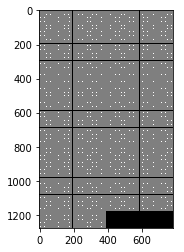

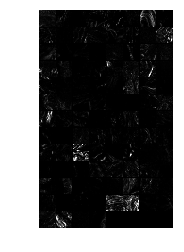

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


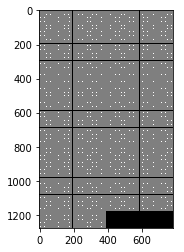

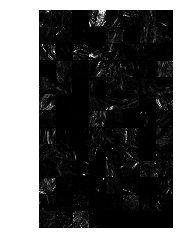

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


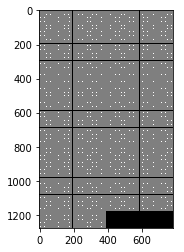

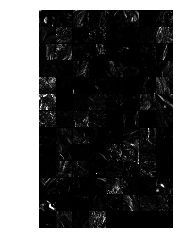

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


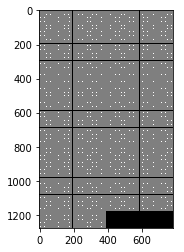

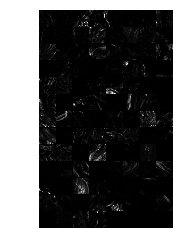

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


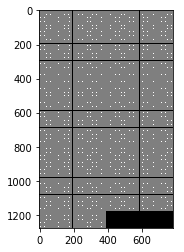

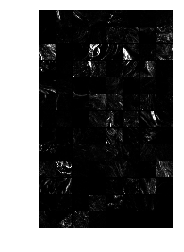

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


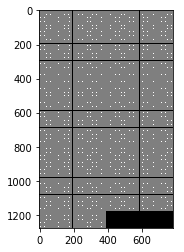

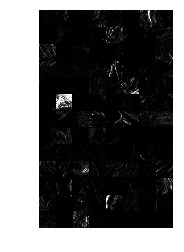

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


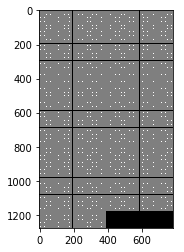

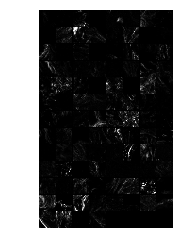

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


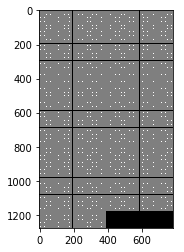

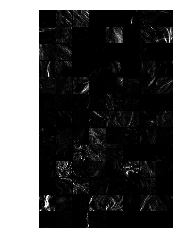

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


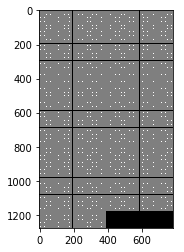

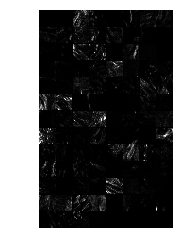

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


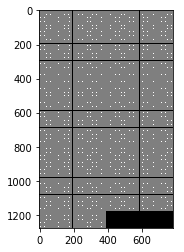

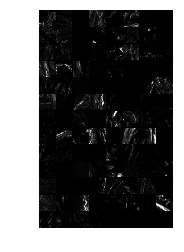

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


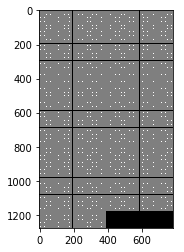

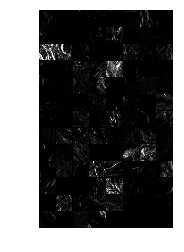

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


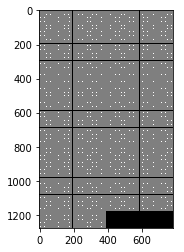

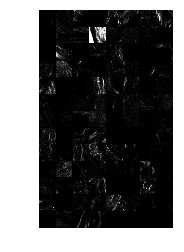

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


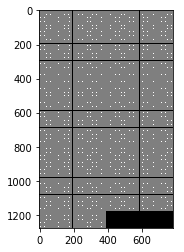

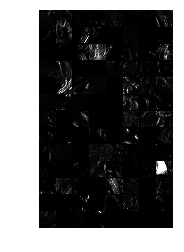

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


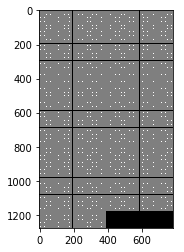

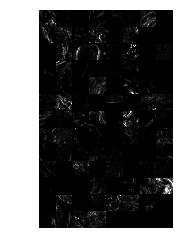

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


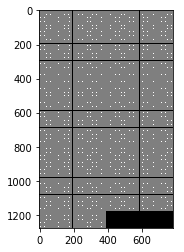

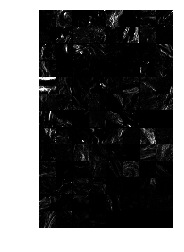

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


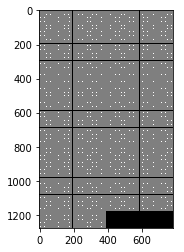

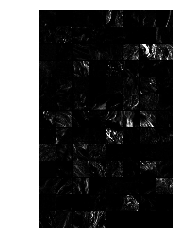

torch.Size([100, 1, 96, 96]) torch.Size([100, 96, 96])
torch.Size([100, 1, 96, 96])


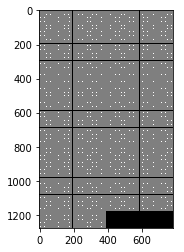

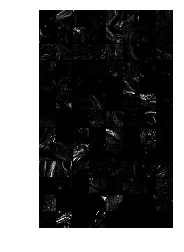

===> Avg. PSNR: 0.0270 dB


In [14]:
test()

In [ ]:
# restart
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)